In [1]:
import pandas as pd
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import nltk
import re

In [2]:
df = pd.read_csv("song_df_indo.csv", encoding="latin")

In [3]:
df.head()

,Unnamed: 0,id,judul,penyanyi,link,lirik,lang
0,8,9,A Lotta Love,3 Diva,https://lirik.kapanlagi.com/artis/3-diva/a-lot...,"(*) IÃ¢ÂÂ¦ I, I, I, IÃ¢ÂÂ¦ Need A Lotta Love...",id
1,10,11,A Minor,Kaneshiba,https://lirik.kapanlagi.com/artis/kaneshiba/a-...,Dari A minor Pindahnya ke D minor Masuk kunci ...,id
2,11,12,A N G,Naff,https://lirik.kapanlagi.com/artis/naff/a-n-g/,NAFF - A.N.G Seluruh hati tlah kudatangi Hanya...,id
3,17,18,A S A,Arwana,https://lirik.kapanlagi.com/artis/arwana/a-s-a/,Dalam malam kucoba mengerti Tentang luka yang ...,id
4,20,21,A Tribute To Maia,Tha Law,https://lirik.kapanlagi.com/artis/tha-law/a-tr...,Now throw ur hand in the air buat duo Maia Jar...,id


In [4]:
def clean(lirik):
    lirik = lirik.lower()
    lirik = re.sub('[^a-z ]+', '', lirik)
    lirik = re.sub('back to reff','', lirik)
    lirik_list = lirik.split()
    clean_lirik = []
    for l in lirik_list:
        if len(l) > 2:
            clean_lirik.append(l)
    return ' '.join(clean_lirik)

In [5]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

In [6]:
def removeStopWords(lirik):
    return stopword.remove(lirik)

In [7]:
df["lirik"] = df["lirik"].apply(clean)

In [8]:
df["lirik_without_stopwords"] = df["lirik"].apply(removeStopWords)

In [9]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [10]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(str(df["lirik"])) 

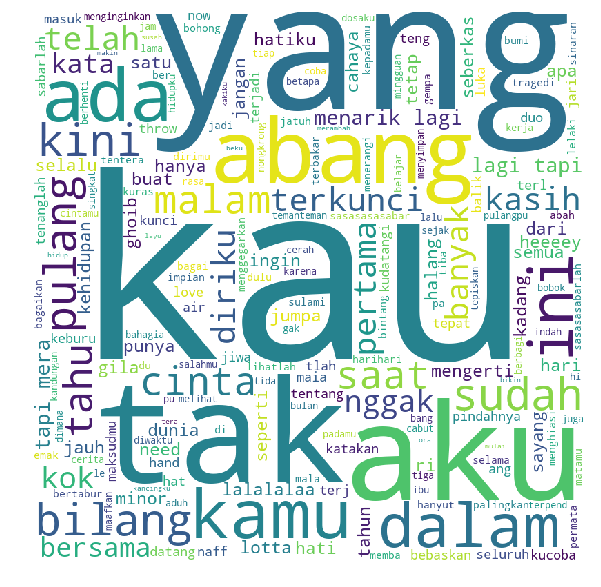

In [11]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)   
plt.show() 

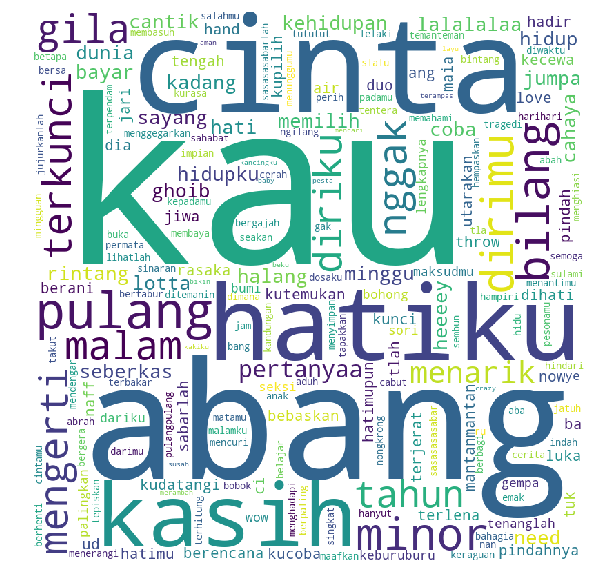

In [12]:
wordcloud_without_stopwords = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(str(df["lirik_without_stopwords"])) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_without_stopwords) 
plt.axis("off") 
plt.tight_layout(pad = 0)   
plt.show() 

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
vector_lirik = CountVectorizer().fit(df['lirik'])

In [15]:
print(len(vector_lirik.vocabulary_))

47916


In [16]:
bow_lirik = vector_lirik.transform(df['lirik'])

In [17]:
sum_words_lirik = bow_lirik.sum(axis=0)

In [18]:
words_freq = [(word, sum_words_lirik[0, idx]) for word, idx in vector_lirik.vocabulary_.items()]

In [19]:
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [20]:
vector_lirik_wsw = CountVectorizer().fit(df['lirik_without_stopwords'])

In [21]:
print(len(vector_lirik_wsw.vocabulary_))

47239


In [32]:
bow_lirik_wsw = vector_lirik_wsw.transform(df['lirik_without_stopwords'])
sum_words_lirik_wsw = bow_lirik_wsw.sum(axis=0)
words_freq_wsw = [(word, sum_words_lirik_wsw[0, idx]) for word, idx in vector_lirik_wsw.vocabulary_.items()]
words_freq_wsw = sorted(words_freq_wsw, key = lambda x: x[1], reverse=False)

In [34]:
words_freq_wsw[:100]

[('harajuku', 1),
 ('setahi', 1),
 ('sumpahin', 1),
 ('miyabi', 1),
 ('dengerdenger', 1),
 ('klakuan', 1),
 ('bragama', 1),
 ('ngandelin', 1),
 ('pingkan', 1),
 ('pantesnya', 1),
 ('mecun', 1),
 ('batam', 1),
 ('psk', 1),
 ('andra', 1),
 ('backbone', 1),
 ('egp', 1),
 ('jaim', 1),
 ('lalalalaaaa', 1),
 ('keburuburu', 1),
 ('pastiin', 1),
 ('menggegarkan', 1),
 ('bergajah', 1),
 ('kaabah', 1),
 ('pembelaanya', 1),
 ('alwahan', 1),
 ('ukiri', 1),
 ('dibawahnya', 1),
 ('akusatu', 1),
 ('mawarnya', 1),
 ('harhari', 1),
 ('kehitaman', 1),
 ('sarnpai', 1),
 ('takutmu', 1),
 ('bersamasamamu', 1),
 ('sasasasasabar', 1),
 ('sasasasabarlah', 1),
 ('tututututunggu', 1),
 ('tututututunggullah', 1),
 ('dikancani', 1),
 ('ngegudo', 1),
 ('seceng', 1),
 ('koncian', 1),
 ('aloh', 1),
 ('etkirainet', 1),
 ('yiha', 1),
 ('risol', 1),
 ('bakwannya', 1),
 ('togenya', 1),
 ('singkongnya', 1),
 ('digamit', 1),
 ('kukerling', 1),
 ('nyebut', 1),
 ('mangkuk', 1),
 ('baksonya', 1),
 ('pingpong', 1),
 ('mataair

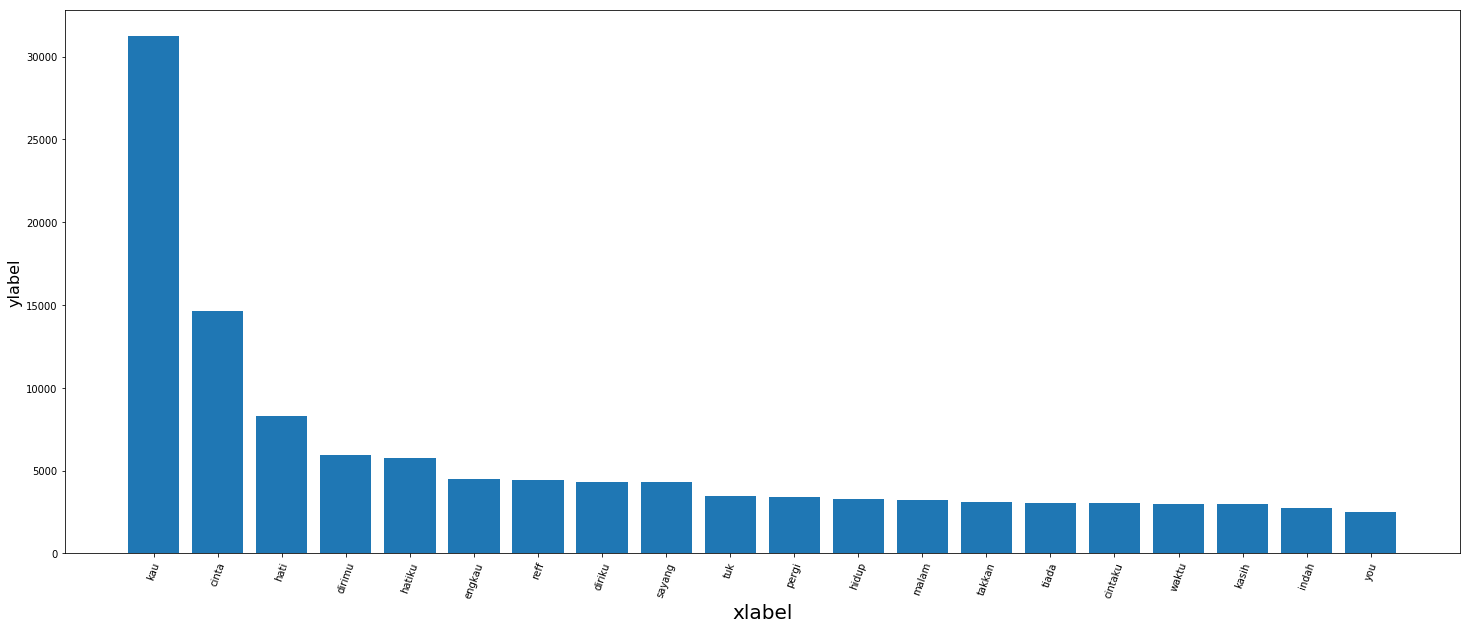

In [24]:
plt.figure(figsize = (25, 10), facecolor = None) 
plt.bar(range(len(words_freq_wsw[:20])), [val[1] for val in words_freq_wsw[:20]], align='center')
plt.xticks(range(len(words_freq_wsw[:20])), [val[0] for val in words_freq_wsw[:20]])
plt.xticks(rotation=70)
plt.xlabel('xlabel', fontsize=20)
plt.ylabel('ylabel', fontsize=16)
plt.show()

In [25]:
bigrams_list = list(nltk.bigrams(df["lirik"]))
#print(bigrams_list)
dictionary2 = [' '.join(tup) for tup in bigrams_list]
#print (dictionary2)

#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
#vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print (words_freq[:10])

[('aku tak', 5274), ('tak pernah', 4320), ('tak bisa', 3410), ('yang kau', 3124), ('cinta yang', 3081), ('yang tak', 3060), ('kau tak', 2988), ('apa yang', 2776), ('tak ada', 2622), ('ada yang', 2410)]


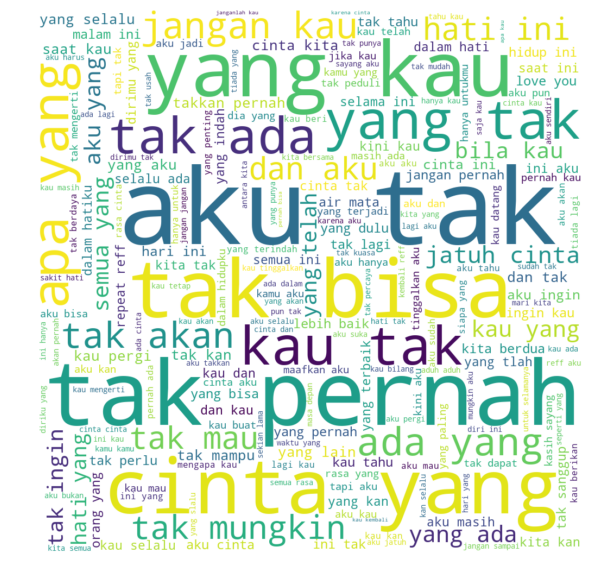

In [26]:
words_dict = dict(words_freq)
wordCloud = WordCloud(max_words=200, width = 1000, height = 1000, 
                background_color ='white', 
                min_font_size = 10)
wordCloud.generate_from_frequencies(words_dict)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordCloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0)   
plt.show() 

In [27]:
trigrams_list = list(nltk.trigrams(df["lirik"]))
dictionary_trigram = [' '.join(tup) for tup in trigrams_list]

#Using count vectoriser to view the frequency of bigrams
vectorizer_trigram = CountVectorizer(ngram_range=(3, 3))
bag_of_words_trigram = vectorizer_trigram.fit_transform(dictionary_trigram)
#vectorizer.vocabulary_
sum_words_trigram = bag_of_words_trigram.sum(axis=0) 
words_freq_trigram = [(word, sum_words_trigram[0, idx]) for word, idx in vectorizer_trigram.vocabulary_.items()]
words_freq_trigram =sorted(words_freq_trigram, key = lambda x: x[1], reverse=True)
print (words_freq_trigram[:10])

[('kau dan aku', 1083), ('aku tak bisa', 1022), ('tak ada yang', 999), ('aku tak mau', 810), ('apa yang kau', 759), ('yang tak pernah', 747), ('tak akan pernah', 708), ('aku jatuh cinta', 630), ('kau tak pernah', 573), ('aku tak ingin', 513)]


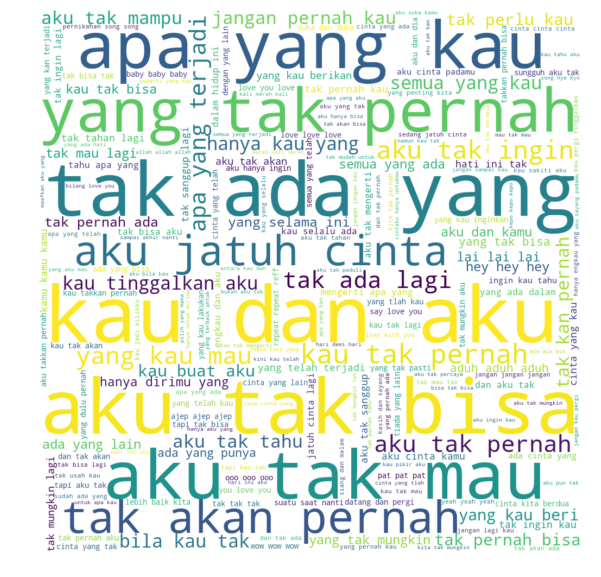

In [31]:
words_dict_trigram = dict(words_freq_trigram)
wordCloud_trigram = WordCloud(max_words=200, width = 1000, height = 1000, 
                background_color ='white', 
                min_font_size = 10)
wordCloud_trigram.generate_from_frequencies(words_dict_trigram)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordCloud_trigram, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0)   
plt.show() 